# Parallel rejection sampler

A naïve approach to parallel rejection sampling in TF

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from hypergeometric import Hypergeometric

In [2]:
H = Hypergeometric(N=374, K=2, n=373)

2022-02-05 13:33:44.750908: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 13:33:44.755790: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 13:33:44.756068: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-05 13:33:44.756719: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

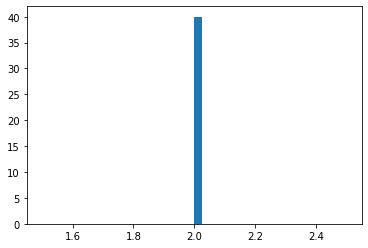

In [6]:
h = tf.function(lambda: H.sample(1), jit_compile=False)().numpy()

plt.hist(h, density=True, bins=40)
x = np.linspace(h.min(), h.max(), 200)
y = H.prob(x)
plt.plot(x, y)